In [ ]:
import os
from google.colab import drive
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.font_manager as fm

In [ ]:
drive.mount('/content/gdriv')

Drive already mounted at /content/gdriv; to attempt to forcibly remount, call drive.mount("/content/gdriv", force_remount=True).


In [ ]:
data_path = "/content/gdriv/My Drive/데이터마이닝" 
print(data_path)
os.listdir(data_path)

/content/gdriv/My Drive/데이터마이닝


['소스코드.ipynb',
 'bus.csv',
 '격자데이터.csv',
 'night_bus_station.csv',
 'term_project.csv',
 'grid_not_0.csv',
 'bus.ipynb',
 '서울시격자1km.csv',
 '서울시격자500m.csv',
 'shop.csv',
 'grid_1km.csv',
 'grid_500m.csv',
 'grid_500m(1).csv',
 'grid_1km(1).csv',
 '버스.csv',
 '데마_분석데이터셋(IDW).csv',
 '데마_분석데이터셋.csv',
 'Untitled1.ipynb',
 'weight.csv',
 'Total_Data.csv',
 'weight1.csv',
 'Untitled0.ipynb',
 '파이썬 코드.ipynb',
 'MCLP.ipynb',
 'Untitled2.ipynb',
 'weight_reg.csv',
 'Untitled3.ipynb',
 'Untitled4.ipynb',
 'weight_new.csv']

In [ ]:
weight = pd.read_csv(data_path + '/weight_new.csv')
df = pd.read_csv(data_path + '/Total_Data.csv', encoding= 'cp949')

In [ ]:
weight = weight.iloc[:,-1]

In [ ]:
df['coord_cent_x'] = (df['max_x']+df['min_x'])/2
df['coord_cent_y'] = (df['max_y']+df['min_y'])/2

In [ ]:
df.head()

,wkt_geom,wkt_geom.1,id,max_x,max_y,min_x,min_y,수요,점포,생활인구,집객시설,극장,숙박시설,지하철역,버스정거장,상주인구,가구,매출건수,세대수,coord_cent_x,coord_cent_y
0,MultiPolygon (((-173570.05627641885075718 4595...,MultiPolygon (((180189.75589999917428941 45136...,32,126.770124,37.561579,126.764479,37.557063,0.0,0.0,0,0,0,0,0,0,0,0,0,0,126.767301,37.559321
1,MultiPolygon (((-173591.39946280769072473 4590...,MultiPolygon (((180189.75590000039665028 45086...,33,126.770137,37.557074,126.764493,37.552558,0.0,0.0,0,0,0,0,0,0,0,0,0,0,126.767315,37.554816
2,MultiPolygon (((-173612.73139145626919344 4585...,MultiPolygon (((180189.75590000019292347 45036...,34,126.770151,37.552569,126.764507,37.548053,0.0,0.0,0,0,0,0,0,0,0,0,0,0,126.767329,37.550311
3,MultiPolygon (((-173026.98585986223770306 4604...,MultiPolygon (((180689.75590000077500008 45236...,91,126.775755,37.570600,126.770110,37.566084,0.0,0.0,0,0,0,0,0,0,0,0,0,0,126.772933,37.568342
4,MultiPolygon (((-173048.32127709902124479 4599...,MultiPolygon (((180689.75590000030933879 45186...,92,126.775769,37.566095,126.770124,37.561579,0.0,0.0,0,0,0,0,0,0,0,0,0,0,126.772946,37.563837


In [ ]:
data_list = []

for i in range(len(df)):
  cent=[df.loc[i,'coord_cent_x'], df.loc[i,'coord_cent_y']]
  data_list.append(cent)


In [ ]:
data_list

[[126.76730105, 37.559321305],
 [126.767315, 37.554816355],
 [126.767329, 37.5503114],
 [126.77293254999998, 37.568342215],
 [126.7729463, 37.563837275],
 [126.77295994999999, 37.559332325],
 [126.7729736, 37.55482737],
 [126.77298729999998, 37.550322415],
 [126.77857885, 37.572857909999996],
 [126.77859219999999, 37.568352965],
 [126.77860554999998, 37.563848019999995],
 [126.77861884999999, 37.55934307],
 [126.77863219999999, 37.554838114999995],
 [126.7786455, 37.55033316],
 [126.77865879999999, 37.545828195],
 [126.7842258, 37.57737333],
 [126.7842388, 37.572868385],
 [126.78425179999999, 37.568363445],
 [126.78426474999999, 37.563858495],
 [126.78427775, 37.559353545],
 [126.7842908, 37.554848590000006],
 [126.78430374999999, 37.55034363],
 [126.78431674999999, 37.545838669999995],
 [126.7898734, 37.58188848],
 [126.7898861, 37.57738354],
 [126.78989875, 37.5728786],
 [126.7899114, 37.56837365],
 [126.78992405, 37.5638687],
 [126.7899367, 37.55936375],
 [126.78994935, 37.55485879]

In [ ]:
df['coord_cent'] = data_list


In [ ]:
df1 = df.iloc[:,-1]

In [ ]:
data = pd.concat([df1, weight], axis=1)

In [ ]:
data.columns = ['coord_cent','w_FS']

In [ ]:
data

,coord_cent,w_FS
0,"[126.76730105, 37.559321305]",-169.853265
1,"[126.767315, 37.554816355]",-169.853265
2,"[126.767329, 37.5503114]",-169.853265
3,"[126.77293254999998, 37.568342215]",-169.853265
4,"[126.7729463, 37.563837275]",-169.853265
...,...,...
2628,"[127.1804051, 37.559412789999996]",-169.853265
2629,"[127.18039425, 37.554907825]",-169.853265
2630,"[127.18038345, 37.550402855]",-169.853265
2631,"[127.1803726, 37.545897885]",-169.853265


In [ ]:
for i in range(len(data)):
  if data.loc[i,'w_FS']<=0:
    data.loc[i,'w_FS']=0

In [ ]:
data

,coord_cent,w_FS
0,"[126.76730105, 37.559321305]",0.0
1,"[126.767315, 37.554816355]",0.0
2,"[126.767329, 37.5503114]",0.0
3,"[126.77293254999998, 37.568342215]",0.0
4,"[126.7729463, 37.563837275]",0.0
...,...,...
2628,"[127.1804051, 37.559412789999996]",0.0
2629,"[127.18039425, 37.554907825]",0.0
2630,"[127.18038345, 37.550402855]",0.0
2631,"[127.1803726, 37.545897885]",0.0


In [ ]:
len(data.loc[data['w_FS']==0,:])

1868

In [ ]:
total = data['w_FS'].sum()
total

278711.03898118867

In [ ]:
!pip install mip

In [ ]:
from mip import Model, xsum, maximize, BINARY  

In [ ]:
# 최적화 문제 계산을 위한 함수
def generate_candidate_sites(points,M=100):
    '''
    Generate M candidate sites with the convex hull of a point set
    Input:
        points: a Numpy array with shape of (N,2)
        M: the number of candidate sites to generate
    Return:
        sites: a Numpy array with shape of (M,2)
    '''
    hull = ConvexHull(points)
    polygon_points = points[hull.vertices]
    poly = Polygon(polygon_points)
    min_x, min_y, max_x, max_y = poly.bounds
    sites = []
    while len(sites) < M:
        random_point = Point([random.uniform(min_x, max_x),
                             random.uniform(min_y, max_y)])
        if (random_point.within(poly)):
            sites.append(random_point)
    return np.array([(p.x,p.y) for p in sites])


from shapely.geometry import Polygon, Point

def generate_candidate_sites(data,M=10000):
    sites = []
    idx=np.random.choice(np.array(range(0,len(data))), M)
    for i in range(len(idx)):
        random_point = Point(np.array(data.iloc[idx]['coord_cent'])[i][0],
                             np.array(data.iloc[idx]['coord_cent'])[i][1])
        sites.append(random_point)
    return np.array([(p.x,p.y) for p in sites])

def generate_candidate_sites(data,Weight,M=10000):
    sites = []
    idx = data.sort_values(by = Weight, ascending = False).iloc[1:M].index
    for i in range(len(idx)):
        random_point = Point(np.array(data.loc[idx]['coord_cent'])[i][0],
                             np.array(data.loc[idx]['coord_cent'])[i][1])
        sites.append(random_point)
    return np.array([(p.x,p.y) for p in sites])



from scipy.spatial import distance_matrix
def mclp(points,K,radius,M,data,w,Weight):

    """
    Solve maximum covering location problem
    Input:
        points: input points, Numpy array in shape of [N,2]
        K: the number of sites to select
        radius: the radius of circle
        M: the number of candidate sites, which will randomly generated inside
        the ConvexHull wrapped by the polygon
    Return:
        opt_sites: locations K optimal sites, Numpy array in shape of [K,2]
        f: the optimal value of the objective function
    """
    print('----- Configurations -----')
    print('  Number of points %g' % points.shape[0])
    print('  K %g' % K)
    print('  Radius %g' % radius)
    print('  M %g' % M)
    import time
    start = time.time()
    sites = generate_candidate_sites(data,Weight,M)
    J = sites.shape[0]
    I = points.shape[0]
    D = distance_matrix(points,sites)
    mask1 = D<=radius
    D[mask1]=1
    D[~mask1]=0

    from mip import Model, xsum, maximize, BINARY

    # Build model
    m = Model("mclp")
    
    # Add variables

    x = [m.add_var(name = "x%d" % j, var_type = BINARY) for j in range(J)]
    y = [m.add_var(name = "y%d" % i, var_type = BINARY) for i in range(I)]


    m.objective = maximize(xsum(w[i]*y[i] for i in range (I)))

    m += xsum(x[j] for j in range(J)) == K

    for i in range(I):
        m += xsum(x[j] for j in np.where(D[i]==1)[0]) >= y[i]

    m.max_gap = 0.05
    m.optimize(max_seconds=300)
    
    end = time.time()
    print('----- Output -----')
    print('  Running time : %s seconds' % float(end-start))
    print('  Optimal coverage points: %g' % m.objective_value)

    solution = []
    for i in range(J):
        if x[i].x ==1:
            solution.append(int(x[i].name[1:]))
    opt_sites = sites[solution]
            
    return opt_sites,m.objective_value

In [ ]:
points = []
for i in data['coord_cent'] :
    points.append(i)

w= []
for i in data['w_FS'] :
    w.append(i)

a = []
for i in [200, 225, 250, 275, 300, 325, 350, 400, 500, 600]:
  radius = radius = (1/88.74/1000)*300
  K = i
  M = 10000
  opt_sites_org,f = mclp(np.array(points),K,radius,M,data,w,'w_FS')
  a.append([i,f/total])


df_opt_FS= pd.DataFrame(opt_sites_org)
df_opt_FS.columns = ['lon', 'lat']
df_opt_FS


----- Configurations -----
  Number of points 2633
  K 200
  Radius 0.00338066
  M 10000
----- Output -----
  Running time : 4.037606716156006 seconds
  Optimal coverage points: 179533
----- Configurations -----
  Number of points 2633
  K 225
  Radius 0.00338066
  M 10000
----- Output -----
  Running time : 4.203866243362427 seconds
  Optimal coverage points: 190096
----- Configurations -----
  Number of points 2633
  K 250
  Radius 0.00338066
  M 10000
----- Output -----
  Running time : 3.966784954071045 seconds
  Optimal coverage points: 199556
----- Configurations -----
  Number of points 2633
  K 275
  Radius 0.00338066
  M 10000
----- Output -----
  Running time : 3.943694829940796 seconds
  Optimal coverage points: 208224
----- Configurations -----
  Number of points 2633
  K 300
  Radius 0.00338066
  M 10000
----- Output -----
  Running time : 3.931828498840332 seconds
  Optimal coverage points: 216138
----- Configurations -----
  Number of points 2633
  K 325
  Radius 0.00338

,lon,lat
0,127.010637,37.568560
1,127.004978,37.568560
2,126.999318,37.568561
3,126.993659,37.564055
4,127.021942,37.519004
...,...,...
595,127.118079,37.509937
596,126.903180,37.509956
597,127.044606,37.586572
598,126.942704,37.591072


In [ ]:
a

[[200, 0.6441536162724522],
 [225, 0.682052295127038],
 [250, 0.7159949359373088],
 [275, 0.7470974061580685],
 [300, 0.7754921281652378],
 [325, 0.801660459189079],
 [350, 0.8254247197826531],
 [400, 0.8670866609690178],
 [500, 0.9308406255488029],
 [600, 0.9678612767307385]]

,number of station,The Ratio of Coverage Points
0,200,0.644154
1,225,0.682052
2,250,0.715995
3,275,0.747097
4,300,0.775492
5,325,0.801660
6,350,0.825425
7,400,0.867087
8,500,0.930841
9,600,0.967861


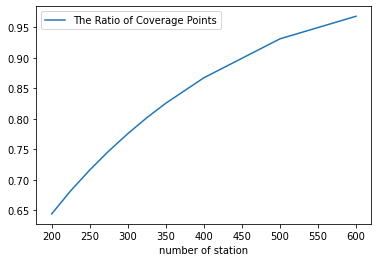

In [ ]:
a = pd.DataFrame(a)
a.columns = ['number of station', 'The Ratio of Coverage Points']

a.plot('number of station','The Ratio of Coverage Points')
a

In [ ]:
opt_sites = []

for i in range(len(df_opt_FS)):
  a=[df_opt_FS.loc[i,'lon'], df_opt_FS.loc[i,'lat']]
  opt_sites.append(a)

In [ ]:
opt_sites = np.array(df_opt_FS)
opt_sites

array([[127.01063745,  37.5685601 ],
       [127.0049778 ,  37.56856047],
       [126.9993182 ,  37.56856057],
       ...,
       [127.04460615,  37.58657204],
       [126.94270435,  37.59107153],
       [127.0898348 ,  37.53699148]])

In [ ]:
points = np.array(points)

In [ ]:
def plot_result(points,opt_sites,radius):
    '''
    Plot the result
    Input:
        points: input points, Numpy array in shape of [N,2]
        opt_sites: locations K optimal sites, Numpy array in shape of [K,2]
        radius: the radius of circle
    '''
    from matplotlib import pyplot as plt
    fig = plt.figure(figsize=(8,8))
    plt.scatter(points[:,0],points[:,1],c='C0')
    ax = plt.gca()
    plt.scatter(opt_sites[:,0],opt_sites[:,1],c='C1',marker='+')
    for site in opt_sites:
        circle = plt.Circle(site, radius, color='C1',fill=False,lw=2)
        ax.add_artist(circle)
    ax.axis('equal')
    ax.tick_params(axis='both',left=False, top=False, right=False,
                       bottom=False, labelleft=False, labeltop=False,
                       labelright=False, labelbottom=False)

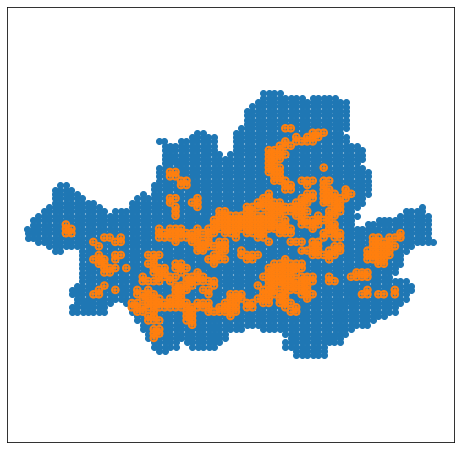

In [ ]:
plot_result(points,opt_sites,radius)

In [ ]:
present = pd.read_csv(data_path + '/night_bus_station.csv')

In [ ]:
present

,역명,경도,위도,수요
0,BC카드.남부터미널,127.014241,37.484657,389.125000
1,KBS스포츠월드,126.850502,37.556671,237.416667
2,KT&G관악지점,126.937254,37.484394,197.739583
3,KT강서지사,126.847840,37.529938,521.208333
4,KT관악지점,126.947106,37.481920,276.125000
...,...,...,...,...
729,회기동현대아파트,127.054441,37.588991,170.416667
730,회기시장,127.056658,37.591000,391.458333
731,훼미리근린공원,127.114839,37.491326,199.625000
732,휘경동입구,127.055221,37.587708,383.125000


In [ ]:
b = []

for i in range(len(present)):
  cent_p=[present.loc[i,'경도'], present.loc[i,'위도']]
  b.append(cent_p)

In [ ]:
b = np.array(b)

In [ ]:
def plot_result(points,b,radius):
    '''
    Plot the result
    Input:
        points: input points, Numpy array in shape of [N,2]
        b: locations K optimal sites, Numpy array in shape of [K,2]
        radius: the radius of circle
    '''
    from matplotlib import pyplot as plt
    fig = plt.figure(figsize=(8,8))
    plt.scatter(points[:,0],points[:,1],c='C0')
    ax = plt.gca()
    plt.scatter(b[:,0],b[:,1],c='C1',marker='+')
    for site in b:
        circle = plt.Circle(site, radius, color='C1',fill=False,lw=2)
        ax.add_artist(circle)
    ax.axis('equal')
    ax.tick_params(axis='both',left=False, top=False, right=False,
                       bottom=False, labelleft=False, labeltop=False,
                       labelright=False, labelbottom=False)

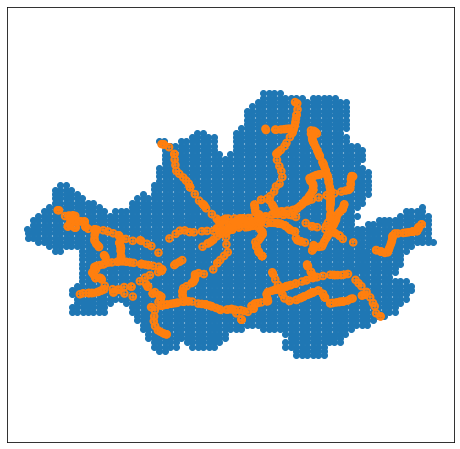

In [ ]:
plot_result(points,b,radius)